# K-Means Clustering and PCA from Scratch

In this notebook, we implement:
- **K-Means Clustering**
- **Principal Component Analysis (PCA)**

We use the **Iris Dataset** (without the `Species` column as input).

**Python Version:** 3.5+


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
df = pd.read_csv("Iris Dataset.csv")

# Separate species and features
species = df["Species"]
X = df.drop("Species", axis=1).values

### PCA Implementation from Scratch
- Standardize the data
- Compute covariance matrix
- Compute eigenvalues and eigenvectors
- Project data on top 3 eigenvectors

In [23]:
# Standardize features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

# PCA from Scratch
def pca(X, n_components=3):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered.T)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    components = eigenvectors[:, :n_components]
    X_reduced = X_centered.dot(components)
    return X_reduced, eigenvalues[:n_components]

X_pca, top_eigenvalues = pca(X_standardized, 3)
print("Top 3 Eigenvalues:", top_eigenvalues)


Top 3 Eigenvalues: [3.7603354  0.92794917 0.23570257]


### PCA Plot in First 3 Principal Components

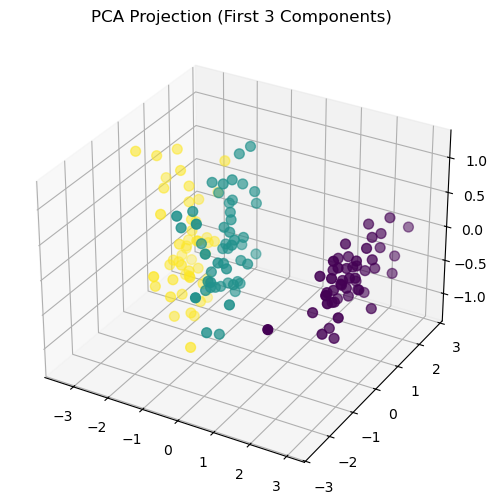

In [24]:
# PCA 3D Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=species.factorize()[0], cmap='viridis', s=50)
ax.set_title('PCA Projection (First 3 Components)')
plt.show()


### K-Means Clustering from Scratch
- Randomly initialize centroids
- Assign points to closest centroid
- Recompute centroids
- Repeat

In [25]:
# K-Means Clustering from Scratch
def kmeans(X, k, epochs=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(epochs):
        dists = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(dists, axis=1)
        for i in range(k):
            if len(X[labels == i]) > 0:
                centroids[i] = X[labels == i].mean(axis=0)
    return labels, centroids

labels, centers = kmeans(X_standardized, 3)
print("K-Means clustering complete.")

K-Means clustering complete.


### Plot Clustering Output vs Actual Species

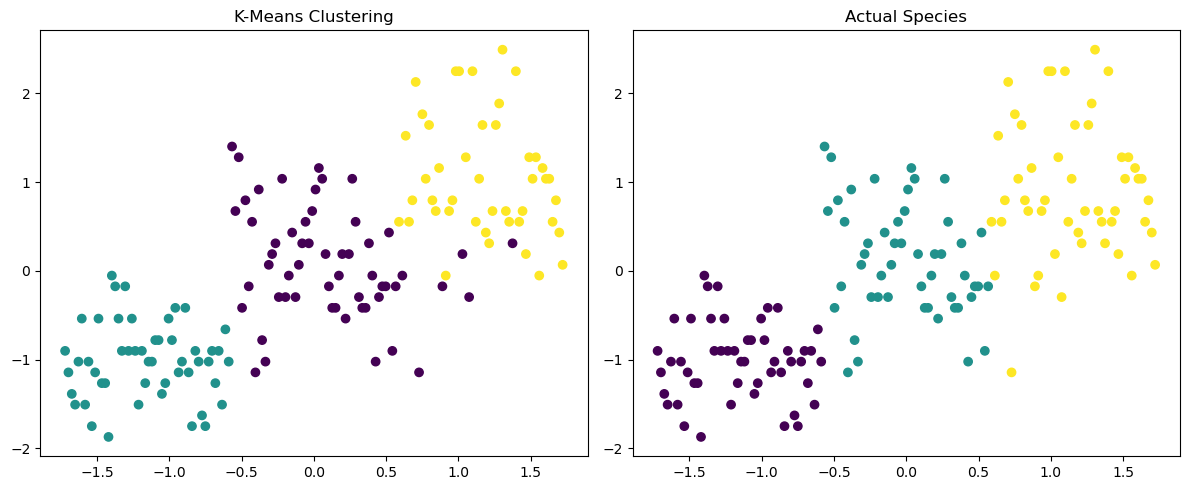

In [26]:
# Plot KMeans Clustering vs Actual
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=species.factorize()[0], cmap='viridis')
plt.title("Actual Species")

plt.tight_layout()
plt.show()
